<a href="https://colab.research.google.com/github/01PrathamS/PyTorch_Exercises/blob/main/Multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## downloaded this helper function to plot graphs

## Creating a Dataset

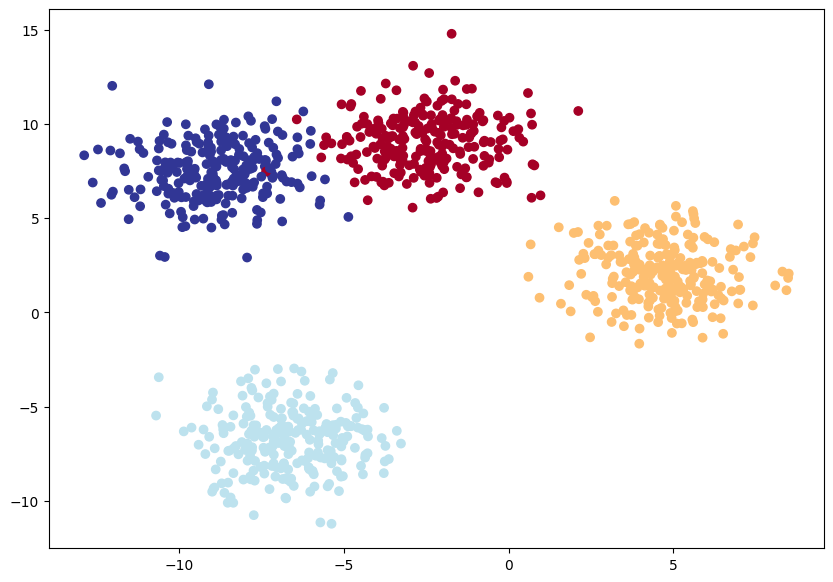

In [39]:
import torch 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs 
from sklearn.model_selection import train_test_split 

NUM_CLASSES = 4 
NUM_FEATURES = 2 
RANDOM_SEED = 42 

X_blob, y_blob = make_blobs(n_samples=1000, 
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED) 

X = torch.from_numpy(X_blob).type(torch.float) 
y = torch.from_numpy(y_blob).type(torch.LongTensor)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

plt.figure(figsize=(10,7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);




In [40]:
device = 'cuda' if torch.cuda.is_available() else 'cpu' 
device

'cpu'

In [41]:
def accuracy_fn(y_pred, y_true):
  correct = torch.eq(y_true, y_pred).sum().item() 
  acc = (correct / len(y_pred)) * 100 
  return acc

In [42]:
from torch import nn 

class BlobModel(nn.Module): 

  def __init__(self, 
               input_features,
               output_features,
               hidden_units):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, 
                  out_features=hidden_units),
        nn.Linear(in_features = hidden_units,
                  out_features = hidden_units), 
        nn.Linear(in_features = hidden_units,
                  out_features = output_features)
    )

  def forward(self, x): 
    return self.linear_layer_stack(x) 

model_0 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES, 
                    hidden_units=8) 
model_0

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [43]:
loss_fn = nn.CrossEntropyLoss() 

optimizer = torch.optim.SGD(model_0.parameters(), 
                            lr=0.1)

In [44]:
model_0(X_train)[:5]

tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
        [ 0.2210, -1.5439,  0.0420,  1.1531],
        [ 2.8698,  0.9143,  3.3169,  1.4027],
        [ 1.9576,  0.3125,  2.2244,  1.1324],
        [ 0.5458, -1.2381,  0.4441,  1.1804]], grad_fn=<SliceBackward0>)

In [45]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


helper_functions.py already exists, skipping download


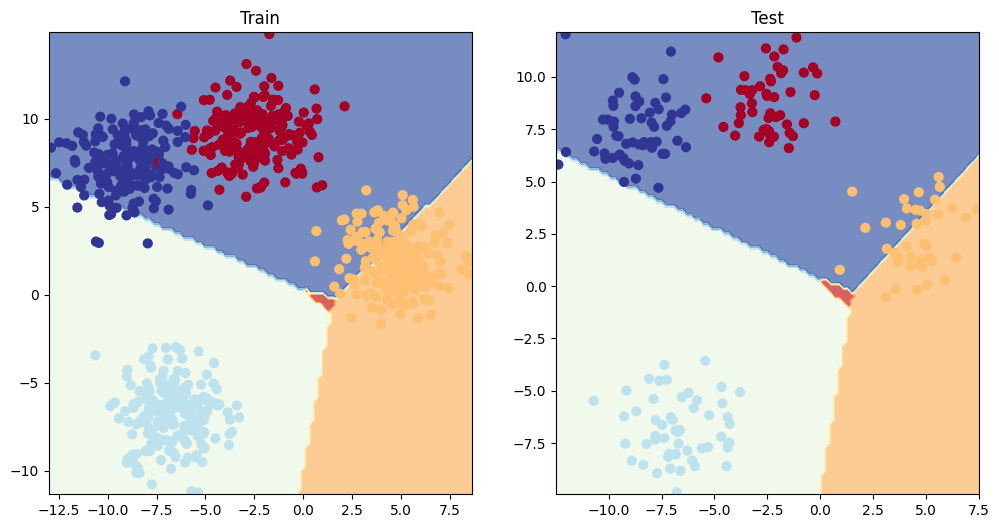

In [46]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## Training and Testing loop

In [47]:
torch.manual_seed(42)

epochs = 100 

for epoch in range(epochs): 

  model_0.train() 

  y_logits = model_0(X_train) 
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) 

  loss = loss_fn(y_logits, y_train)   
  acc = accuracy_fn(y_true=y_train, 
                    y_pred=y_pred) 
  
  optimizer.zero_grad() 

  loss.backward() 

  optimizer.step() 

  model_0.eval()

  with torch.inference_mode(): 

    test_logits = model_0(X_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)


    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, 
                           y_pred=test_pred) 
    
    if epoch % 10 == 0: 
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 1.04324, Acc: 65.50% | Test Loss: 0.57861, Test Acc: 95.50%
Epoch: 10 | Loss: 0.14398, Acc: 99.12% | Test Loss: 0.13037, Test Acc: 99.00%
Epoch: 20 | Loss: 0.08062, Acc: 99.12% | Test Loss: 0.07216, Test Acc: 99.50%
Epoch: 30 | Loss: 0.05924, Acc: 99.12% | Test Loss: 0.05133, Test Acc: 99.50%
Epoch: 40 | Loss: 0.04892, Acc: 99.00% | Test Loss: 0.04098, Test Acc: 99.50%
Epoch: 50 | Loss: 0.04295, Acc: 99.00% | Test Loss: 0.03486, Test Acc: 99.50%
Epoch: 60 | Loss: 0.03910, Acc: 99.00% | Test Loss: 0.03083, Test Acc: 99.50%
Epoch: 70 | Loss: 0.03643, Acc: 99.00% | Test Loss: 0.02799, Test Acc: 99.50%
Epoch: 80 | Loss: 0.03448, Acc: 99.00% | Test Loss: 0.02587, Test Acc: 99.50%
Epoch: 90 | Loss: 0.03300, Acc: 99.12% | Test Loss: 0.02423, Test Acc: 99.50%


## Making Inference

In [48]:
model_0.eval() 
with torch.inference_mode(): 
  y_logits = model_0(X_test)

y_pred_probs = torch.softmax(y_logits, dim=1)

y_preds = y_pred_probs.argmax(dim=1) 

print(f"Predictions: {y_preds[:10]}\nLabels: {y_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_test, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Test accuracy: 99.5%


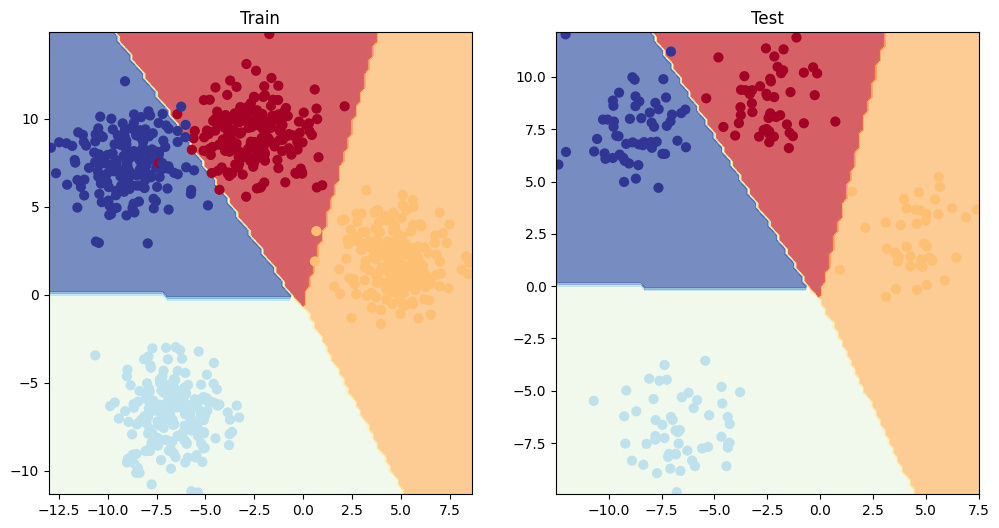

In [49]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)